<a href="https://colab.research.google.com/github/marleenkj/tweet_classification/blob/main/TweetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Classification

**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
#import os
import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from wordcloud import WordCloud


In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import string

import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Import & EDA

### Importing the data

In [ ]:
df = pd.read_csv('Data_Gp2.csv', delimiter = ";",encoding= 'unicode_escape')

### Exploratory data analysis

1. Viewing the data

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head(10)

id  ...                                                                                                                                                                                                                                       Texts
0  1,38715E+18  ...                                                                                       Former-Pfizer VP Yeadon: 'I dont think you could come up with a better plan' for depopulation than the pandemic and vaccines https://t.co/GfXRPzDJVd
1   1,3739E+18  ...                                                                                                                                                                                #justsayno mass experimental gene therapy, aka, "vaccine"...
2  1,36024E+18  ...                                                                                                                             So every CVS, Walgreens, WalMart...in Texas is fully booked for the vaccine. Today is the first day available??
3  1,34223E+18  ...                                                                                                                                                                        if you dont wash your rice, dont worry about whats in the vaccine
4  1,38738E+18  ...                                                                 Can Unmask at at small outdoor gathering if fully vaccinated #FoundOnPixstory\r\n\r\nhttps://t.co/lLyUX4EHYv @CDCgov @WHO @AstraZeneca @CNN #IndiaNeedsOxygen #VaccinesWork
5  1,39045E+18  ...                                                                                                                                                     So my whole body aches from my vaccine yesterday. But it's better than the alternative.
6  1,34669E+18  ...                                                                                                                               If you eat Taco Bell you have absolutely and I mean ABSOLUTELY no reason to worry about whats in the vaccine
7  1,34621E+18  ...                                                                                              Yay for science and scientific research<U+0001F389><U+0001F38A>!! What a start to 2021....Just got my Pfizer vaccine (1st dose).#PfizerVaccine
8  1,38711E+18  ...                                                                                           Two weeks out since 2nd vaccine dose and lovin it \r\n\r\n<U+270C><U+FE0F><U+2764><U+FE0F> <U+0001F489> \r\n#COVIDVaccination \r\n#GetVaccinated
9  1,38692E+18  ...  Brave Dr. Larry Palevsky Exposes The Entire #Covid19 Fraud'This Is Not A Vaccine, This is NOT A Vaccine'...\r\n'The Synthetic Spike Protein is a BioWeapon'\r\n...And Can Attach To Receptors All Over The Body\r\nhttps://t.co/rejnIgwXHb

[10 rows x 3 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6000 non-null   object
 1   is_misinfo  6000 non-null   int64 
 2   Texts       6000 non-null   object
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


2. Viewing missing values

In [ ]:
#this code won't work here since there are no empty tweets, and anyways they would be empty strings not na:
#df.isna().sum().sort_values(ascending = False).reset_index(name="n").plot.bar(x='index', y='n', rot=45, figsize=(20,5))

In [ ]:
df.isna().sum().sort_values(ascending = False)

id            0
is_misinfo    0
Texts         0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending = False)

id            0
is_misinfo    0
Texts         0
dtype: int64

3. Checking for the distribution of the target variable

In [ ]:
df.is_misinfo.value_counts()

0    3992
1    2008
Name: is_misinfo, dtype: int64

creating the pie-chart

## Data-Preprocessing

In [ ]:
# Dropping the ID column
df = df.drop(["id"],axis=1)

In [ ]:
# Renaming the columns
df.set_axis(['is_misinfo', 'text'], axis=1, inplace=True)

In [ ]:
df.head(8)

is_misinfo                                                                                                                                                                         text
0           1                        Former-Pfizer VP Yeadon: 'I dont think you could come up with a better plan' for depopulation than the pandemic and vaccines https://t.co/GfXRPzDJVd
1           1                                                                                                                 #justsayno mass experimental gene therapy, aka, "vaccine"...
2           0                                                              So every CVS, Walgreens, WalMart...in Texas is fully booked for the vaccine. Today is the first day available??
3           0                                                                                                         if you dont wash your rice, dont worry about whats in the vaccine
4           0  Can Unmask at at small outdoor gathering if fully vaccinated #FoundOnPixstory\r\n\r\nhttps://t.co/lLyUX4EHYv @CDCgov @WHO @AstraZeneca @CNN #IndiaNeedsOxygen #VaccinesWork
5           0                                                                                      So my whole body aches from my vaccine yesterday. But it's better than the alternative.
6           0                                                                If you eat Taco Bell you have absolutely and I mean ABSOLUTELY no reason to worry about whats in the vaccine
7           0                               Yay for science and scientific research<U+0001F389><U+0001F38A>!! What a start to 2021....Just got my Pfizer vaccine (1st dose).#PfizerVaccine

Data visualization

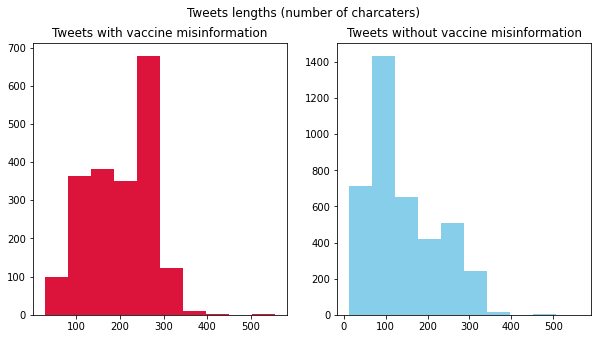

In [ ]:
#Number of characters in tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = df[df['is_misinfo']==1]['text'].str.len()
ax1.hist(text_len,color='crimson')
ax1.set_title('Tweets with vaccine misinformation')
text_len = df[df['is_misinfo']==0]['text'].str.len()
ax2.hist(text_len,color='skyblue')
ax2.set_title('Tweets without vaccine misinformation')
fig.suptitle('Tweets lengths (number of charcaters)')
print(flush="")

Adding features Part I

In [ ]:
def get_num_hashtags(text):
    number = text.count('#')
    return number

df['hashtags'] = df['text'].apply(lambda x: get_num_hashtags(x))

In [ ]:
def get_num_arobas(text):
    number = text.count('@')
    return number

df['arobas'] = df['text'].apply(lambda x: get_num_arobas(x))

### Cleaning the data




Cleaning the text:

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\r', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.encode("ascii", "ignore").decode()
    return text

df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head(8)

is_misinfo  ... arobas
0           1  ...      0
1           1  ...      0
2           0  ...      0
3           0  ...      0
4           0  ...      4
5           0  ...      0
6           0  ...      0
7           0  ...      0

[8 rows x 4 columns]

In [ ]:
# Calculating number of letters per text
def get_letterlength(text):
    number = len(text) - text.count(" ")
    return number

df['letterlength'] = df['text'].apply(lambda x: get_letterlength(x))

### Tokenization

In [ ]:
from nltk import word_tokenize, punkt
nltk.download('punkt')
df['text'] = df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


is_misinfo  ... letterlength
0           1  ...          100
1           1  ...           46
2           0  ...           86
3           0  ...           52
4           0  ...          117

[5 rows x 5 columns]

Adding features Part II

In [ ]:
def get_num_words(text):
    number = len(text)
    return number

df['num_words'] = df['text'].apply(lambda x: get_num_words(x))

In [ ]:
df['letter_word_ratio'] = df['letterlength']/df['num_words']
df = df.drop(['letterlength'],axis=1)

Removing stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
  cleaned_text = [word for word in text if word not in stopwords.words('english')]
  return cleaned_text

df['text'] = df['text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


is_misinfo  ... letter_word_ratio
0           1  ...          4.761905
1           1  ...          6.571429
2           0  ...          4.777778
3           0  ...          4.000000
4           0  ...          6.882353

[5 rows x 6 columns]

**Wordcloud visualizations**

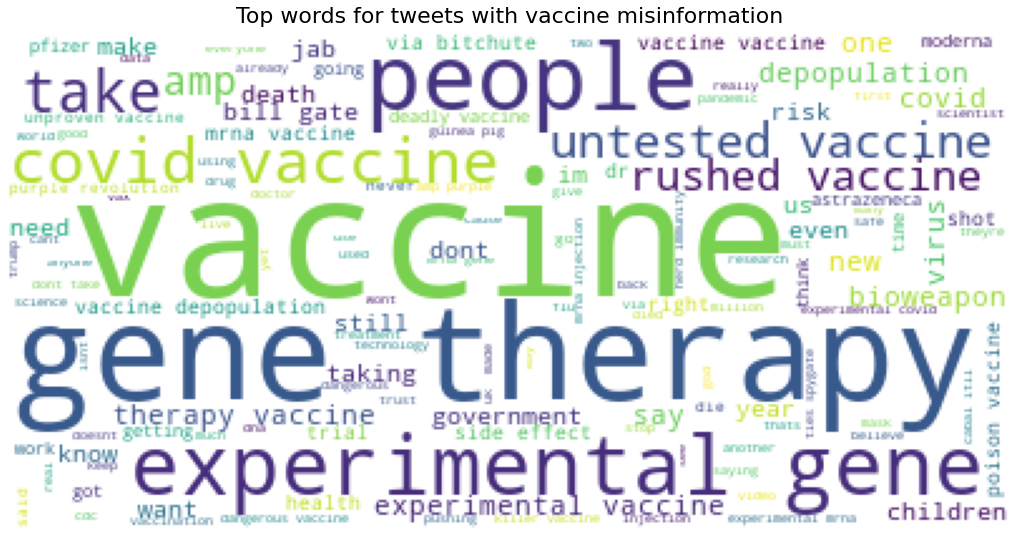

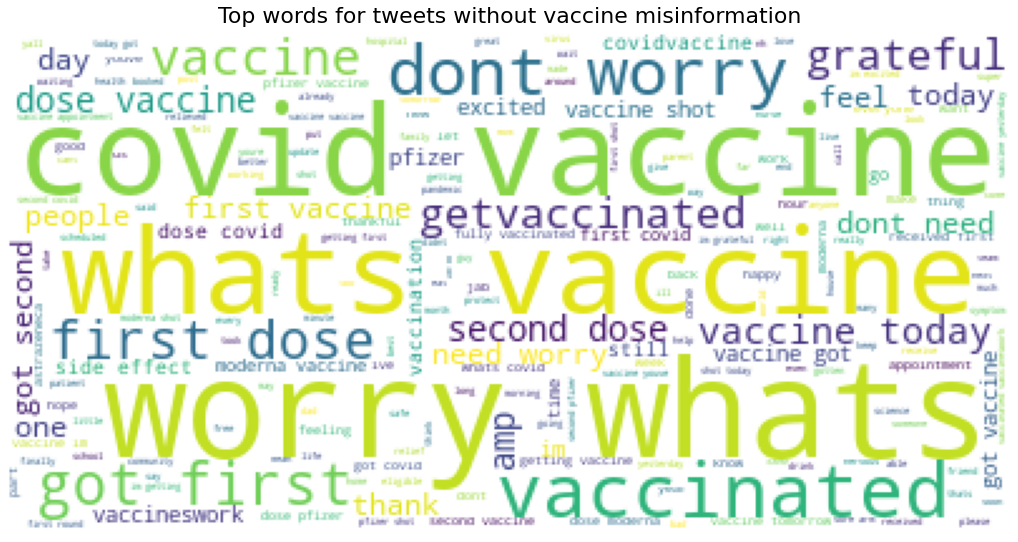

In [ ]:
from itertools import chain

misinfo_keywords = list(chain.from_iterable(df.loc[df['is_misinfo'] == 1, 'text'].tolist()))
non_misinfo_keywords = list(chain.from_iterable(df.loc[df['is_misinfo'] == 0, 'text'].tolist()))

def show_wordcloud(title, data):
  wc = WordCloud(
    background_color='white', 
    max_words=200, 
    )

  wc.generate(data)
  plt.figure(figsize=(18,10))
  plt.title(title, fontdict={'size': 22,  'verticalalignment': 'bottom'})
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

show_wordcloud(
    'Top words for tweets with vaccine misinformation',
    ', '.join(misinfo_keywords)
    ) # this is ugly and bad and should be killed with fire
show_wordcloud(
    'Top words for tweets without vaccine misinformation',
    ', '.join(non_misinfo_keywords)
    )

**Graph Visualizations**

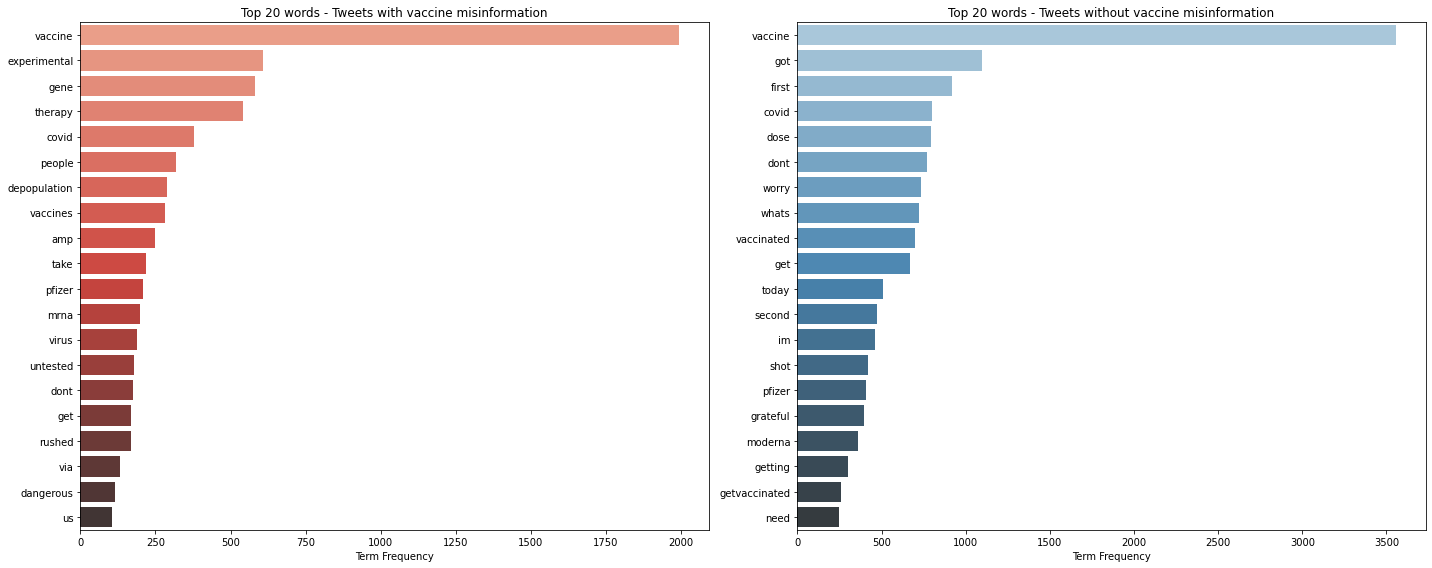

In [ ]:
from collections import Counter
y1 = list(list(zip(*Counter(misinfo_keywords).most_common()))[0])[0:20]  # hacky and bad
x1 = list(list(zip(*Counter(misinfo_keywords).most_common()))[1])[0:20]

y2 = list(list(zip(*Counter(non_misinfo_keywords).most_common()))[0])[0:20]  # hacky and bad
x2 = list(list(zip(*Counter(non_misinfo_keywords).most_common()))[1])[0:20]

#Top 20 words from each category
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=y1, x=x1, orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 words - Tweets with vaccine misinformation")
ax[0].set_xlabel("Term Frequency")

sns.barplot(y=y2, x=x2, orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 words - Tweets without vaccine misinformation")
ax[1].set_xlabel("Term Frequency")

plt.tight_layout()
plt.show()

Stemming words

In [ ]:
stemmer = nltk.SnowballStemmer("english")
def stem_text(text):
  stemmed_text = [stemmer.stem(word) for word in text]
  return stemmed_text

df['text'] = df['text'].apply(stem_text)
df.head()

is_misinfo  ... letter_word_ratio
0           1  ...          4.761905
1           1  ...          6.571429
2           0  ...          4.777778
3           0  ...          4.000000
4           0  ...          6.882353

[5 rows x 6 columns]

Checking for balanced data

0    3992
1    2008
Name: is_misinfo, dtype: int64


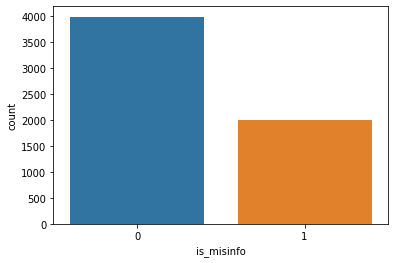

In [ ]:
sns.countplot(x="is_misinfo",data=df)
print(df['is_misinfo'].value_counts())

### Feature Construction

**Words Embedding for Neural Networks**

In [ ]:
import gensim.downloader as api
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
word2vec_transfer = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded


Creating a feature matrix


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def vectorize(tokens):
    def dummy(doc):
        return doc
    vectorizer = CountVectorizer(tokenizer=dummy, preprocessor=dummy)
    text_vectors = vectorizer.fit_transform(tokens)
    return text_vectors

text_vectors = vectorize(df['text'])

print(text_vectors.toarray().shape)

(6000, 10385)


Create labels and features arrays

In [ ]:
features = text_vectors
labels = df["is_misinfo"]

## Model Estimation

**Function to evaluate classifiers:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

#todo: add crossvalidation
NUM_ITERS = 10

def evaluate_clf(clf, features, labels, num_iters=NUM_ITERS, test_size=0.25):
    print (clf)
    train_accuracy = []
    test_accuracy = []
    precision = []
    recall = []
    first = True
    for trial in range(num_iters):
        features_train, features_test, labels_train, labels_test =\
            train_test_split(features, labels, test_size=test_size)
        clf.fit(features_train, labels_train)
        predictions_train = clf.predict(features_train)
        predictions = clf.predict(features_test)
        train_accuracy.append(accuracy_score(labels_train, predictions_train))
        test_accuracy.append(accuracy_score(labels_test, predictions))
        precision.append(precision_score(labels_test, predictions))
        recall.append(recall_score(labels_test, predictions))
        if trial % 10 == 0:
            if first:
                sys.stdout.write('\nProcessing')
            sys.stdout.write('.')
            sys.stdout.flush()
            first = False

    print ("done.\n")
    print ("training accuracy: {}".format(np.mean(train_accuracy)))
    print ("testing accuracy: {}".format(np.mean(test_accuracy)))
    print ("precision: {}".format(np.mean(precision)))
    print ("recall:    {}".format(np.mean(recall)))
    return [np.mean(test_accuracy),np.mean(precision),np.mean(recall)]

### Splitting the data

Into training, validation and testing set

### Fitting models

Using different models: logistic regression; random forest, decision tree, gradient boosting; adaboosting; support vector classifier, ANN

In [ ]:
from sklearn.naive_bayes import GaussianNB
g_clf = GaussianNB()
                 
g_scores = evaluate_clf(g_clf, features.toarray(), labels)

GaussianNB()

Processing.done.

training accuracy: 0.8487555555555556
testing accuracy: 0.6636
precision: 0.4992603347910952
recall:    0.8909689136403955


In [ ]:
from sklearn.linear_model import LogisticRegression

l_clf = LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
max_iter=100, multi_class='ovr', penalty='l2', random_state=42, solver='liblinear', tol=0.001, verbose=0)

l_scores = evaluate_clf(l_clf, features, labels)

LogisticRegression(C=1e-08, multi_class='ovr', random_state=42,
                   solver='liblinear', tol=0.001)

Processing.done.

training accuracy: 0.6662444444444444
testing accuracy: 0.6649333333333334
precision: 0.8
recall:    0.002584998219908841


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.cluster import KMeans
k_clf = KMeans(n_clusters=2, tol=0.001)
k_clf_scores = evaluate_clf(k_clf, features, labels)

KMeans(n_clusters=2, tol=0.001)

Processing.done.

training accuracy: 0.4810444444444445
testing accuracy: 0.48426666666666673
precision: 0.2240205611778198
recall:    0.45295689205605383


In [ ]:
from sklearn.svm import SVC
s_clf = SVC(kernel='rbf', C=1000,gamma = 0.0001,random_state = 42, class_weight = 'balanced')
s_clf_scores = evaluate_clf(s_clf, features, labels, num_iters=3)

SVC(C=1000, class_weight='balanced', gamma=0.0001, random_state=42)

Processing.done.

training accuracy: 0.997037037037037
testing accuracy: 0.9722222222222223
precision: 0.969443560594431
recall:    0.9486666590977278


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 5,max_features = 'sqrt',n_estimators = 10, random_state = 42)
rf_clf_scores = evaluate_clf(rf_clf, features, labels)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=10,
                       random_state=42)

Processing.done.

training accuracy: 0.7219333333333333
testing accuracy: 0.7108
precision: 0.984954199368685
recall:    0.15347413618682776


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, min_samples_split = 20)
dt_clf_scores = evaluate_clf(dt_clf,features, labels)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20)

Processing.done.

training accuracy: 0.9893111111111113
testing accuracy: 0.9674666666666667
precision: 0.9595287255954756
recall:    0.9431795515287928


In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,random_state = 42)
gb_clf_scores = evaluate_clf(gb_clf, features, labels, num_iters=3)

GradientBoostingClassifier(random_state=42)

Processing.done.

training accuracy: 0.9757037037037036
testing accuracy: 0.9648888888888889
precision: 0.9811180602872844
recall:    0.9110693021217012


In [ ]:
from sklearn.linear_model  import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_clf_scores = evaluate_clf(sgd_clf, features, labels)

SGDClassifier(max_iter=5)

Processing.done.

training accuracy: 0.9984
testing accuracy: 0.9687333333333331
precision: 0.9643910196547925
recall:    0.9421033392901249


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adc_clf=AdaBoostClassifier(random_state=42)
adc_clf_scores=evaluate_clf(adc_clf, features, labels)

AdaBoostClassifier(random_state=42)

Processing.done.

training accuracy: 0.9742222222222223
testing accuracy: 0.9680666666666665
precision: 0.9701288770453236
recall:    0.9325954594933059


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf_scores = evaluate_clf(knn_clf, features, labels)

KNeighborsClassifier(n_neighbors=3)

Processing.done.

training accuracy: 0.8967777777777778
testing accuracy: 0.8472666666666667
precision: 0.9811138218856303
recall:    0.5446220413943359


## Model Evaluation

## Selecting the best model

In [ ]:
lst_scores = [g_scores, l_scores, k_clf_scores, s_clf_scores, rf_clf_scores, dt_clf_scores, gb_clf_scores, sgd_clf_scores,adc_clf_scores, knn_clf_scores]

df_scores = pd.DataFrame(lst_scores, columns =['Accuracy', 'Precision', 'Recall'],index=[
    "Gaussian Naive Bayes Classifier",
    "Logistic Regression Classifier",
    "K-means Clustering",
    "Support Vector Machine Classifier",
    "Random Forest",
    "Decision Tree",
    "Gradient Boosting Classifier",
    "Stochastic Gradient Descent (SGD)",
    "Adaboost Classifier",
    "K-Nearest Neighbour"
])

df_scores=df_scores.round(2)
df_scores

def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

In [ ]:
def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

d = dict.fromkeys(df_scores.select_dtypes('float').columns, "{:.2}")
df_scores.style.applymap(color_results_green, subset=pd.IndexSlice[:, ['Precision', 'Recall']]).format(d)

### RNN Model 1

In [ ]:
X = df["text"]
y = df.is_misinfo	

In [ ]:
X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size=0.20,random_state=42)

In [ ]:
MAX_LEN_SEQUENCE = df.text.apply(len).max()

Words Embedding for Neural Networks

In [ ]:
import gensim.downloader as api
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
word2vec_transfer = api.load("glove-twitter-50")

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert a sentence (list of words) into a matrix
#representing the words in the embedding space
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
X_train_embed_2 = embedding(word2vec_transfer, X_train)
X_test_embed_2 = embedding(word2vec_transfer, X_test)


X_train_pad_2 = pad_sequences(X_train_embed_2, dtype='float32', padding='post', maxlen=MAX_LEN_SEQUENCE)
X_test_pad_2 = pad_sequences(X_test_embed_2, dtype='float32', padding='post', maxlen=MAX_LEN_SEQUENCE)

In [ ]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 3176, 1: 1624}
Baseline accuracy:  0.68


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model = init_model()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad_2, y_train, 
          batch_size = 32,
          epochs=40,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/40
105/105 [==============================] - 9s 33ms/step - loss: 0.4957 - accuracy: 0.7625 - val_loss: 0.3711 - val_accuracy: 0.8451
Epoch 2/40
105/105 [==============================] - 2s 20ms/step - loss: 0.3076 - accuracy: 0.8717 - val_loss: 0.3189 - val_accuracy: 0.8694
Epoch 3/40
105/105 [==============================] - 2s 21ms/step - loss: 0.2520 - accuracy: 0.8952 - val_loss: 0.2523 - val_accuracy: 0.8931
Epoch 4/40
105/105 [==============================] - 2s 20ms/step - loss: 0.2245 - accuracy: 0.9080 - val_loss: 0.2464 - val_accuracy: 0.8986
Epoch 5/40
105/105 [==============================] - 2s 20ms/step - loss: 0.2053 - accuracy: 0.9134 - val_loss: 0.2390 - val_accuracy: 0.8986
Epoch 6/40
105/105 [==============================] - 2s 20ms/step - loss: 0.1886 - accuracy: 0.9226 - val_loss: 0.2441 - val_accuracy: 0.8979
Epoch 7/40
105/105 [==============================] - 2s 20ms/step - loss: 0.1729 - accuracy: 0.9292 - val_loss: 0.2279 - val_accuracy: 0.9056

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_rnn1 = model.predict(X_test_pad_2)
y_pred_rnn1 = y_pred_rnn1 > 0.5

print("Confusion matrix:")
cf_matrix = confusion_matrix(y_test, y_pred_rnn1)
print(cf_matrix)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rnn1)*100))

Confusion matrix:
[[762  54]
 [ 43 341]]
Accuracy: 91.92%


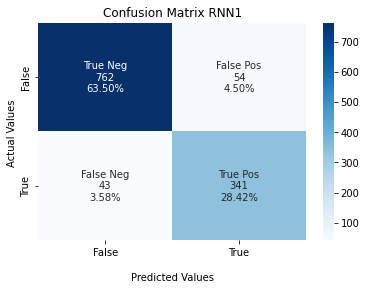

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix RNN1');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

## Try a second one

In [ ]:
def init_model_2():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(56, activation='tanh'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

model_2 = init_model_2()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model_2 = init_model_2()

history = model_2.fit(X_train_pad_2, y_train, 
          batch_size = 32,
          epochs=40,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/40
105/105 [==============================] - 9s 39ms/step - loss: 0.3795 - accuracy: 0.8417 - val_loss: 0.3872 - val_accuracy: 0.8417
Epoch 2/40
105/105 [==============================] - 3s 27ms/step - loss: 0.2738 - accuracy: 0.8905 - val_loss: 0.2769 - val_accuracy: 0.8958
Epoch 3/40
105/105 [==============================] - 3s 27ms/step - loss: 0.2347 - accuracy: 0.9024 - val_loss: 0.3567 - val_accuracy: 0.8528
Epoch 4/40
105/105 [==============================] - 3s 27ms/step - loss: 0.2102 - accuracy: 0.9128 - val_loss: 0.2437 - val_accuracy: 0.9042
Epoch 5/40
105/105 [==============================] - 3s 27ms/step - loss: 0.1905 - accuracy: 0.9250 - val_loss: 0.2374 - val_accuracy: 0.9069
Epoch 6/40
105/105 [==============================] - 3s 27ms/step - loss: 0.1711 - accuracy: 0.9333 - val_loss: 0.2383 - val_accuracy: 0.9049
Epoch 7/40
105/105 [==============================] - 3s 27ms/step - loss: 0.1560 - accuracy: 0.9381 - val_loss: 0.2455 - val_accuracy: 0.9007

ValueError: ignored

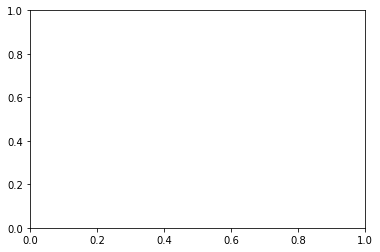

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,8)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,8)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
res = model_2.evaluate(X_test_pad_2, y_test, verbose=0)

print(f'The accuracy evaluated on the test set is of {res[1]*100:.3f}%')

In [ ]:
y_pred_rnn2 = model_2.predict(X_test_pad_2)
y_pred_rnn2 = y_pred_rnn2 > 0.5

print("Confusion matrix:")
cf_matrix_2 = confusion_matrix(y_test, y_pred_rnn2)

print(cf_matrix_2)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rnn2)*100))

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix_2.flatten()/np.sum(cf_matrix_2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_2, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix RNN2');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

# Prediction

In [ ]:
def predict(text, df_tokens, clf):
    num_hashtags = get_num_hashtags(text)
    num_arobas = get_num_arobas(text)
    text = clean_text(text)
    text = word_tokenize(text)
    letter_length = get_letterlength(text)
    num_words = get_num_words(text)
    letter_word_ratio = letter_length/num_words
    text = remove_stopwords(text)
    text = stem_text(text)
    text_series = df_tokens["text"]
    text_series = text_series.append(pd.Series([text]), ignore_index=True)
    text_series = vectorize(text_series)
    print(clf.predict(text_series[-1]))
    return clf.predict(text_series[-1])

result = predict("this is a message against vaccines. they have baby dna in them and big pharma is pushing them. vaccines are the devil, they will kill you!!!", df, s_clf)